<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2022</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Mohamed Ahmed Abdelhamid

GUC-ID: 46-16738

Elective Tutorial No.: T-3

**Member 2**

Name: Marwan Khalid Farag

GUC-ID: 46-14780

Elective Tutorial No.: T-2

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [2]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
# You can use any library to import your data.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [3]:
def read_data(path):
    import glob
    import cv2
    training_data = []
    training_folders = [f for f in glob.glob("{}/*".format(path))]
    i = 0
    for folder in training_folders:
        print(folder)
        images = [cv2.imread(file) for file in glob.glob("{}/*".format(folder))]
        images = np.array(images).reshape(len(images), -1)
        target = np.ones((images.shape[0], 1)) * i
        images = np.concatenate([images, target], axis=1)
        training_data.append(images)
        i += 1
    training_data = np.concatenate(training_data)
    X = training_data[:, :-1]
    Y = training_data[:, -1:]
    return X, Y

In [4]:
X_train, train_labels = read_data('Data/train')
X_test, test_labels = read_data('Data/test')

Data/train\airplane
Data/train\bird
Data/train\truck
Data/test\airplane
Data/test\bird
Data/test\truck


<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [5]:
def k_means(X, num_iterations=1000):
    
    import random
    option1, option2, option3 = random.sample(range(0, X.shape[0]), 3)
    c1 = X[option1]
    c2 = X[option2]
    c3 = X[option3]

    membership = np.empty(X.shape[0])
    while(num_iterations > 0):
        num_iterations -= 1
        c1_points = []
        c2_points = []
        c3_points = []

        c1_distances = np.linalg.norm(X - c1, axis=1)
        c2_distances = np.linalg.norm(X - c2, axis=1)
        c3_distances = np.linalg.norm(X - c3, axis=1)

        for i in range(0, c1_distances.shape[0]):
            if c1_distances[i] == min(c1_distances[i], c2_distances[i], c3_distances[i]):
                c1_points.append(X[i])
                membership[i] = 0

            elif c2_distances[i] == min(c1_distances[i], c2_distances[i], c3_distances[i]):
                c2_points.append(X[i])
                membership[i] = 1
            
            else:
                c3_points.append(X[i])
                membership[i] = 2

        new_c1 = np.mean(c1_points, axis=0)
        new_c2 = np.mean(c2_points, axis=0)
        new_c3 = np.mean(c3_points, axis=0)

        if(np.array_equal(c1, new_c1) and np.array_equal(c2, new_c2) and np.array_equal(c3, new_c3)):
            break
        
        c1 = new_c1
        c2 = new_c2
        c3 = new_c3

    membership = np.array(membership)
    centroids = np.array([c1, c2, c3])

    c1_points = np.array(c1_points)
    c2_points = np.array(c2_points)
    c3_points = np.array(c3_points)

    s1 = np.mean(np.linalg.norm(c1_points - c1, axis=1))
    s2 = np.mean(np.linalg.norm(c2_points - c2, axis=1))
    s3 = np.mean(np.linalg.norm(c3_points - c3, axis=1))

    d12 = np.linalg.norm(c1 - c2)
    d23 = np.linalg.norm(c2 - c3)
    d13 = np.linalg.norm(c1 - c3)

    r12 = (s1 + s2) / d12
    r23 = (s2 + s3) / d23
    r13 = (s1 + s3) / d13

    dbi = max(r12, r23, r13)

    return membership, centroids, dbi

In [6]:
membership, centroids, dbi = k_means(X_train)

In [8]:
print(membership)
print(centroids)
print(dbi)
print(centroids.shape)

[1. 2. 2. ... 2. 1. 1.]
[[203.44034597 192.42915289 178.03892139 ... 188.39277538 186.53421521
  180.93869244]
 [197.43993908 189.068913   177.6413478  ... 109.21625738 119.45935656
  120.91585761]
 [ 93.77475928 102.32565337  94.65955983 ...  93.90457359 107.87792297
  107.56344567]]
2.270395130238266
(3, 3072)


<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [ ]:
best_dbi = np.Infinity

for i in range(10):
    membership, centroids, dbi = k_means(X_train)
    if dbi < best_dbi:
        best_centroids = centroids
        best_membership = membership
        best_dbi = dbi

In [ ]:
truck_membership = best_membership[:5000]
bird_membership = best_membership[5000:10000]
airplane_membership = best_membership[10000:]

airplane_label = np.bincount(airplane_membership.astype(np.int64)).argmax()
bird_label = np.bincount(bird_membership.astype(np.int64)).argmax()
truck_label = np.bincount(truck_membership.astype(np.int64)).argmax()

max_airplane_count = np.max(np.bincount(airplane_membership.astype(np.int64)))
max_bird_count = np.max(np.bincount(bird_membership.astype(np.int64)))
max_truck_count = np.max(np.bincount(truck_membership.astype(np.int64)))

y_test_label = np.concatenate([np.ones(1000)*truck_label, np.ones(1000)*bird_label, np.ones(1000)*airplane_label]).astype(np.int8)

In [ ]:
max_counts = [max_airplane_count, max_bird_count, max_truck_count]
max_counts

[2185, 3014, 2889]

In [ ]:
def predict(X_test, centroids):
    distances = np.zeros((X_test.shape[0], centroids.shape[0]))
    for cluster_index, centroid in enumerate(centroids):
        distances[:, cluster_index] = np.linalg.norm(X_test - centroid, axis=1)
    
    return np.argmin(distances, axis=1).reshape(X_test.shape[0], 1)

In [ ]:
predictions = predict(X_test, best_centroids)

In [ ]:
confusion_matrix = np.zeros((3, 3))
for true, prediction in zip(y_test_label, predictions.flatten()):
    confusion_matrix[true, prediction] += 1

<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

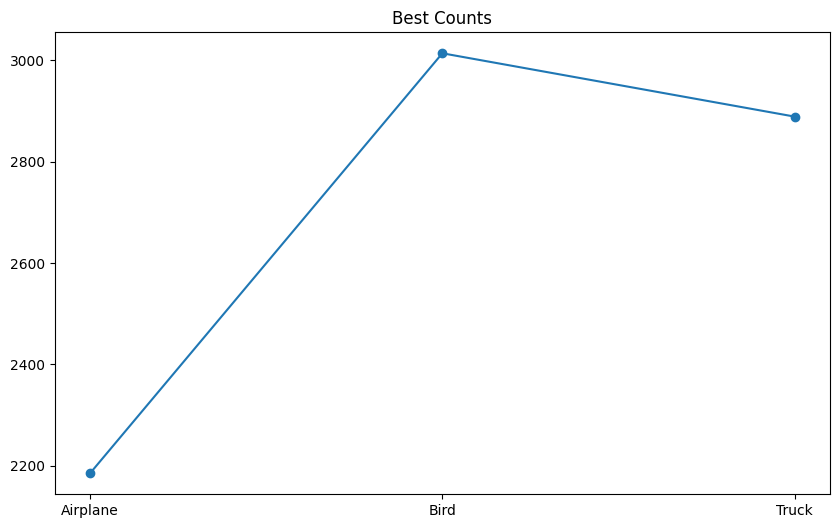

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

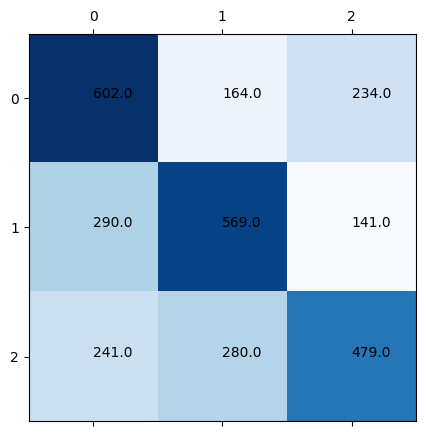

In [ ]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

In [16]:
airplane_label, bird_label, truck_label

(2, 0, 1)